#What are the top 50 suburbs that vehicles involved in crashes (with injuries or fatalities) in Victoria originate from?

## Data source

CrashStats data is provided to users by VicRoads for the purpose of supplying information about road crashes in Victoria for educational purposes.

The data provided allows users to analyse Victorian fatal and injury crash data based on time, location, conditions, crash type, road user type, object hit etc.

File ACCIDENT.zip contains the following files extracted from the VicRoads CrashStats database.  The period extracted is 1 January 2006 through to 9 November 2015

https://www.data.vic.gov.au/data/dataset/crash-stats-data-extract (see download link)

Extract the zip and load the vehicle file.

In [42]:
## config and imports
%matplotlib inline
from pandas import *

In [43]:
## load the crash stats vehicle file
crashstats_vehicle = read_csv("VEHICLE.csv",low_memory=False)

## get crash counts based on owner postcode
postcode_counts = crashstats_vehicle.groupby('OWNER_POSTCODE').size()
## sort descending, dataframe it, reset index, tidy up postcode field and ignore dirty data
postcode_counts.sort(ascending=False)
postcode_counts = DataFrame(postcode_counts,columns=['CRASH COUNT'])
postcode_counts.reset_index(inplace=True)
postcode_counts['OWNER_POSTCODE'] = postcode_counts['OWNER_POSTCODE'].str.replace(',','').astype('int32')
postcode_counts = postcode_counts[(postcode_counts['OWNER_POSTCODE'] >= 1000) & (postcode_counts['OWNER_POSTCODE'] < 10000)]

In [44]:
## put a name to the postcode
## note this is not completely accurate because one postcode may represent 
## multiple suburbs, but they should be fairly close geographically
postcode_suburbs = read_csv("postcodes.csv")

In [45]:
## subset to top 50
postcode_counts_top_50 = postcode_counts.head(50)

In [46]:
## put suburb names against postcodes
postcode_counts_top_50 = merge(postcode_counts_top_50,postcode_suburbs,how="left",left_on='OWNER_POSTCODE',right_on="POSTCODE")

In [47]:
## just the columns we want, display table
COLS = ['OWNER_POSTCODE','SUBURB','CRASH COUNT']
postcode_counts_top_50 = postcode_counts_top_50[COLS]
postcode_counts_top_50

,OWNER_POSTCODE,SUBURB,CRASH COUNT
0,3175,Dandenong,3227
1,3977,Cranbourne,3059
2,3029,Hoppers Crossing,2719
3,3030,Werribee,2707
4,3064,Craigieburn,2345
5,3805,Narre Warren,2319
6,3199,Frankston,2056
7,3350,Ballarat,2050
8,3021,St Albans,2019
9,3023,Caroline Springs,1985


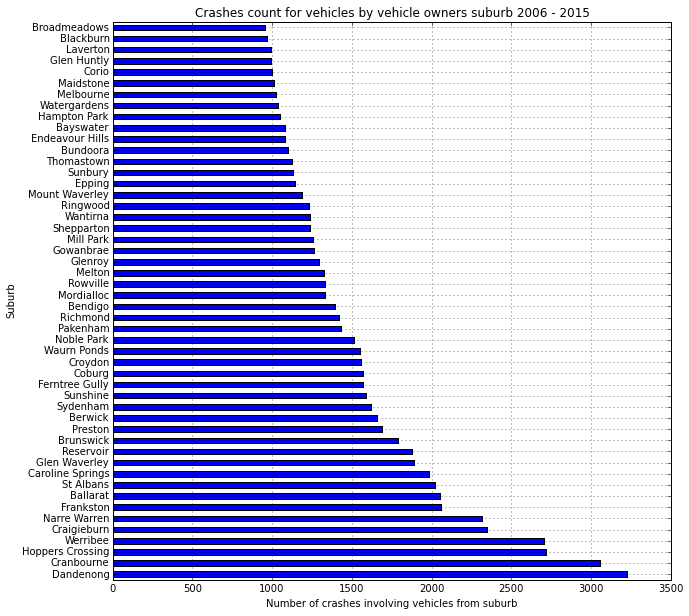

In [48]:
## plot
postcode_counts_top_50.index = postcode_counts_top_50['SUBURB']
cols = ['CRASH COUNT']
postcode_counts_top_50 = postcode_counts_top_50['CRASH COUNT']
ax = postcode_counts_top_50.plot(figsize=(10,10),kind="barh",grid=True,title="Crashes count for vehicles by vehicle owners suburb 2006 - 2015")
ax.set_xlabel("Number of crashes involving vehicles from suburb")
ax.set_ylabel("Suburb")